In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.shape

(19735, 29)

In [5]:
import numpy as np
x=df.T2.values.reshape([-1,1])
print(x)
y=pd.DataFrame(df, columns=['T6'])
print(y)

[[19.2       ]
 [19.2       ]
 [19.2       ]
 ...
 [25.62857143]
 [25.414     ]
 [25.26428571]]
              T6
0       7.026667
1       6.833333
2       6.560000
3       6.433333
4       6.366667
...          ...
19730  24.796667
19731  24.196667
19732  23.626667
19733  22.433333
19734  21.026667

[19735 rows x 1 columns]


In [6]:
y=pd.DataFrame(df, columns=['T6'])
print(y)

              T6
0       7.026667
1       6.833333
2       6.560000
3       6.433333
4       6.366667
...          ...
19730  24.796667
19731  24.196667
19732  23.626667
19733  22.433333
19734  21.026667

[19735 rows x 1 columns]


In [7]:
#dropping date and light column
df.drop(['date', 'lights'], axis=1, inplace= True)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
df.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

### Description of independent and dependent variiable
T2- Temperature in living room

T6- Temperature outside the building

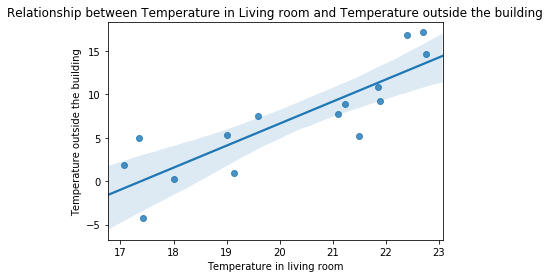

In [11]:
#select sample of dataset
simple_linear_df= df[['T2', 'T6']].sample(15, random_state=2)
#regression plot
k=sns.regplot(x='T2', y='T6', data=simple_linear_df)
plt.xlabel('Temperature in living room')
plt.ylabel('Temperature outside the building')
plt.title('Relationship between Temperature in Living room and Temperature outside the building');

###### Question 12

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
model= LinearRegression().fit(x, y)
r_sq= model.score(x, y)
round(r_sq, 2)

0.64

In [13]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X = normalised_df.drop('Appliances', axis='columns')
y = normalised_df['Appliances']

In [14]:
X.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [15]:
y.head()

0    0.046729
1    0.046729
2    0.037383
3    0.037383
4    0.046729
Name: Appliances, dtype: float64

## Model Building

In [16]:
#Now, we split our dataset into training and testing dataset since the feature and target variable has been segmented
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)
linear_model=LinearRegression() 

#### Question 13

In [30]:
#fit the model to the training dataset
linear_model.fit(X_train, y_train)

#Obtain predictions
predicted_values=linear_model.predict(X_test)


from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test, predicted_values)
print('Mean Absolute Error:', round(mae, 2))

Mean Absolute Error: 0.05


#### Question 14

In [31]:
import numpy as np 
rss= np.sum(np.square(y_test-predicted_values))
print('Residual Sum of Squares:', round(rss, 2))

Residual Sum of Squares: 45.35


#### Question 15

In [34]:

from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, predicted_values))
print('Root Mean Squared Error', round(rmse, 3))

Root Mean Squared Error 0.088


#### Question 16

In [33]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, predicted_values)
print('Coefficient of Determination:', round(r2_score, 2))

Coefficient of Determination: 0.15


### Ridge regression

In [21]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [24]:
#first 5 coefficien of ridge regression
ridge_reg.coef_[:5]

array([-0.02154858,  0.51193201, -0.19387955, -0.40113385,  0.28740783])

### Lasso Regression

In [25]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [40]:
#first five coefficient of lasso regression
lasso_reg.coef_[:5]

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ])

###### Question 17

In [27]:
import pandas as pd
#Comparing effects of regularization
def get_weights_df(model, feat, col_name):
    #this function returns the weight of every feature
    weights=pd.Series(model.coef_, feat.columns).sort_values()
    weights_df=pd.DataFrame(weights).reset_index()
    weights_df.columns=['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights= get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df= get_weights_df(lasso_reg, X_train, 'Lasso_Weight')

  

In [28]:
final_weights=pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights, lasso_weights_df, on='Features')

In [29]:
print(final_weights)

       Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0          RH_2            -0.456698     -0.401134     -0.000000
1         T_out            -0.321860     -0.250765      0.000000
2            T2            -0.236178     -0.193880      0.000000
3            T9            -0.189941     -0.188584     -0.000000
4          RH_8            -0.157595     -0.156596     -0.000110
5        RH_out            -0.077671     -0.050541     -0.049557
6          RH_7            -0.044614     -0.046291     -0.000000
7          RH_9            -0.039800     -0.041701     -0.000000
8            T5            -0.015657     -0.020727     -0.000000
9            T1            -0.003281     -0.021549      0.000000
10          rv2             0.000770      0.000743     -0.000000
11          rv1             0.000770      0.000743     -0.000000
12  Press_mm_hg             0.006839      0.006516     -0.000000
13           T7             0.010319      0.010021     -0.000000
14   Visibility          

 From Above table the lowest and highest feature weights rom the linear regression model are RH_2 and RH_1 respectively

##### Question 18

In [48]:
#ridge regression train data
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)
ridge_predicted = ridge_reg.predict(X_test)

In [49]:
ridge_predicted

array([0.03321872, 0.24043824, 0.03461337, ..., 0.06872351, 0.10025536,
       0.05851175])

In [37]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, ridge_predicted))
print('Root Mean Squared Error for Ridge Regression', round(rmse, 3))

Root Mean Squared Error for Ridge Regression 0.088


By comparing the RMSE for both linear Regression and Ridge regression, 

Hence no change in the Root Mean Square error

###### Question 19

In [44]:
from sklearn.linear_model import Lasso
lasso_reg= Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [43]:
#feature weifhts or coefficient of lasso regression
lasso_reg.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

From the above it shows that there are five non-zero feature weights in the lasso regression model

###### Question 20

In [50]:
lasso_predicted = lasso_reg.predict(X_test)
lasso_predicted

array([0.07370267, 0.08143458, 0.07716072, ..., 0.07792848, 0.09034412,
       0.08359255])

In [54]:
from sklearn.metrics import mean_squared_error
rmse= np.sqrt(mean_squared_error(y_test, lasso_predicted))
print('Root Mean Squared Error for Lasso Regression:', round(rmse, 3))

Root Mean Squared Error for Lasso Regression: 0.094
